# SEATTLE ACCIDENT COLLISION ANALYSIS (Coursera Capstone Project)

## Introduction / Business Understanding

* Predicting an accident collision based on the data collected is always challenging aspect of the data science topology. In our daily routine commuting, it is always advisable to take the route which has less blockage or rush due to accidents. Our main purpose here is to build a model which can predict a model to assist the daily commuters avoiding these issues.<br><br>
* There are many factors which causes the accidents and to predict the pattern using these factors can be very helpful to avoid such incidents. Imagine an accident occurring at a particular place or time many times and by analysis we find the relation of the occurrence of accident with factors which can be avoided or warned against. <br><br>
* This will be highly beneficial for authorities to take necessary steps and implement a plan for drivers to avoid it from happening in future.

## Data Understanding

* Here for my Coursera Capstone Project, I have chosen Seattle Collision data for from 2004 to present, which is downloaded from arcgis.com by filtering Seattle.<br><br>
* Using the provided data, I will try to analyze the data based on the <b>SEVERITY CODE</b> which ranges from 0 to 3, that includes <b>unknown , prop damage, injury, serious injury and fatality</b> options. <br><br>
* I will analyze the data and propose a model by linking the <b>SEVERITY CODE</b> with the <b>Weather, Road, and Light</b> conditions at the time of accident and will try to predict the occurrence of future accident for other drivers so it can be avoided.<br><br>
* I will also try to correlate the accidents severity with other provided factors like <b>Address type, Road Junctions, alcohol influence, Speeding, Vehicle direction</b> etc to check if they have any direct or indirect relation to the severity of the accident and whether these attributes makes any affect on the occurance of accidents

Data Source: http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR={%22latestWkid%22:2926,%22wkid%22:2926}

## Data Preperation

In [2]:
#importing important libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Downloading the required CSV fie from seattlecitygis

In [3]:
#loading dataset csv file
DataSetCol = pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv ")
DataSetCol.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


Lets see the details of the csv data

In [4]:
DataSetCol.describe(include='all')

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,213918.000000,213918.000000,221389.00000,221389.000000,221389.000000,221389,221389,217677,71884.000000,216801,...,195050,194880,5192,1.272050e+05,9928,211976,195159,221389.000000,2.213890e+05,221389
unique,NaN,NaN,NaN,NaN,NaN,221386,2,3,NaN,25198,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,195232,144917,NaN,298,...,128535,119448,5192,NaN,9928,44922,44922,NaN,NaN,209392
mean,-122.330756,47.620199,110695.00000,144708.701914,144936.934541,NaN,NaN,NaN,37612.330964,NaN,...,NaN,NaN,NaN,7.971063e+06,NaN,NaN,NaN,261.296320,9.583127e+03,NaN
std,0.030055,0.056043,63909.64371,89126.729589,89501.312920,NaN,NaN,NaN,51886.084219,NaN,...,NaN,NaN,NaN,2.611523e+06,NaN,NaN,NaN,3247.953616,7.148311e+04,NaN
min,-122.419091,47.495573,1.00000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,-122.349280,47.577151,55348.00000,71634.000000,71634.000000,NaN,NaN,NaN,28652.750000,NaN,...,NaN,NaN,NaN,6.007029e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,-122.330363,47.616053,110695.00000,127184.000000,127184.000000,NaN,NaN,NaN,29973.000000,NaN,...,NaN,NaN,NaN,8.033011e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,-122.311998,47.664290,166042.00000,209783.000000,210003.000000,NaN,NaN,NaN,33984.000000,NaN,...,NaN,NaN,NaN,1.018101e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [4]:
DataSetCol.shape

(221389, 40)

In [5]:
DataSetCol.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

First thing we will do is to find the number of EMPTY / MISSING values in the dataset. We will then decide based on their percentage whether to keep those columns or drop them. Having high number of missing data in the attributes will make the data unreliable and model accuracy will be highly affected.

,Total Nulls,Percent Nulls
PEDROWNOTGRNT,216197,97.654807
SPEEDING,211461,95.515586
EXCEPTRSNDESC,209610,94.679501
INATTENTIONIND,191201,86.364273
INTKEY,149505,67.530455
EXCEPTRSNCODE,120403,54.385268
SDOTCOLNUM,94184,42.542312
LIGHTCOND,26509,11.973946
WEATHER,26420,11.933746
ROADCOND,26339,11.897158


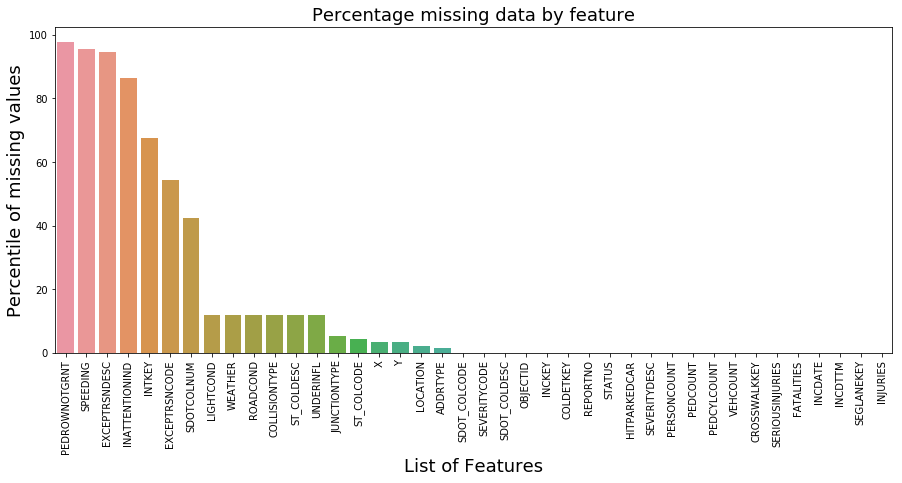

In [5]:
total_null=DataSetCol.isnull().sum().sort_values(ascending=False)
percent_null = (DataSetCol.isnull().sum()/DataSetCol.isnull().count()*100).sort_values(ascending=False)
missing_data_perc = pd.concat([total_null, percent_null], axis=1, keys=['Total Nulls', 'Percent Nulls'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_perc.index, y=missing_data_perc['Percent Nulls'])
plt.xlabel('List of Features', fontsize=18)
plt.ylabel('Percentile of missing values', fontsize=18)
plt.title('Percentage missing data by feature', fontsize=18)
missing_data_perc.head(10)


From above percentile value, it is visible that top 7 categories can be dropped completely from the database because the NULL values are more than 50% and we just cant replace them with average value as it will not beneficial for the Quality of the data.

In [6]:
#removing the attributes having NULL values more than 40%
DataSetCol.drop(['PEDROWNOTGRNT','SPEEDING','EXCEPTRSNDESC','INATTENTIONIND','INTKEY','EXCEPTRSNCODE','SDOTCOLNUM'],axis=1, inplace=True)

In [8]:
DataSetCol.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

We will drop the colmumns like Location, ObjectID, Report no, Status and different keys because they have NO IMPACT on our target variable SEVERITYCODE.

In [7]:
DataSetCol.drop(['LOCATION','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','ST_COLCODE','ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY','SDOT_COLCODE','SDOT_COLDESC'],axis=1,inplace=True)

In [10]:
DataSetCol.columns

Index(['X', 'Y', 'ADDRTYPE', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'],
      dtype='object')

In [11]:
DataSetCol.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
HITPARKEDCAR        object
dtype: object

Now lets see our attributes individually. We will now need to check what type of data is inside our attributes and if there are any EMPTY values, whether we need to convert them to average value or drop them totally.

In [12]:
DataSetCol['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137596
Injury Collision                   58747
Unknown                            21595
Serious Injury Collision            3102
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [13]:
DataSetCol['SEVERITYCODE'].value_counts()

1     137596
2      58747
0      21594
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

We will replace the Unknown values of SEVERITYDESC and 0 of SEVERITYCODE to Empty values so later we can check the percentile value of EMPTY values in the our TARGET attribute which is SEVERITYCODE to see if it will be feasible to drop these values or convert them to top used value

In [8]:
DataSetCol['SEVERITYCODE'].replace("0",np.nan, inplace = True)
DataSetCol['SEVERITYDESC'].replace("Unknown",np.nan, inplace = True)

In [9]:
DataSetCol[['SEVERITYCODE','SEVERITYDESC']].isnull().sum()

SEVERITYCODE    21595
SEVERITYDESC    21595
dtype: int64

In [10]:
Severity_unknown=DataSetCol[['SEVERITYDESC']].isnull().sum().sort_values(ascending=False)
percent_unknown = (DataSetCol[['SEVERITYDESC']].isnull().sum()/DataSetCol[['SEVERITYDESC']].isnull().count()*100).sort_values(ascending=False)
unknown_data_perc = pd.concat([Severity_unknown, percent_unknown], axis=1, keys=['Severity Unknown', 'Percent Unknown'])
unknown_data_perc.head()

,Severity Unknown,Percent Unknown
SEVERITYDESC,21595,9.754324


Above calculation shows that Unknown categories in SEVERITY CODE list which was coded as 0 are around 10% of the data. Based on the average value, we can either change this data to CODE 1 or drop this value. Here we will convert them to Code 1 which is "Property Damage only Collision"

In [17]:
DataSetCol['SEVERITYCODE'].describe(include='all')

count     199794
unique         4
top            1
freq      137596
Name: SEVERITYCODE, dtype: object

As we can see from above that the top used CODE is 1, So now we will convert all Unknown values to 1 so we can normalize the data

In [11]:
DataSetCol['SEVERITYCODE'].replace(np.nan,"1", inplace = True)
DataSetCol['SEVERITYDESC'].replace(np.nan,"Property Damage Only Collision", inplace = True)

In [19]:
DataSetCol[['SEVERITYCODE','SEVERITYDESC']].isnull().sum()

SEVERITYCODE    0
SEVERITYDESC    0
dtype: int64

In [20]:
DataSetCol['SEVERITYCODE'].value_counts()

1     159191
2      58747
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

In [21]:
DataSetCol.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    159191
2             Injury Collision                   58747
2b            Serious Injury Collision            3102
3             Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [22]:
DataSetCol.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
HITPARKEDCAR        object
dtype: object

As per our understanding we dont need INCDTTM and INCDATE along with SEVERITYDESC as this will not impact our model so we will delete it. This is because we are already taking LIGHTCOND attribute which can clearly state whether its day time or night time at the time of the accident. It will be more than enough.

In [12]:
DataSetCol.drop(['INCDATE','INCDTTM','SEVERITYDESC'],axis=1,inplace=True)

Provided coordinates might help us in improving the predictance of the Model therefor we will need X and Y coordinates. To understand clearly, We will change the name as follows: X = LONGITUDE, Y = LATITUDE

In [13]:
DataSetCol.rename(columns = {"X":"LONGITUDE", "Y":"LATITUDE"}, inplace=True)
DataSetCol.dtypes

LONGITUDE          float64
LATITUDE           float64
ADDRTYPE            object
SEVERITYCODE        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
JUNCTIONTYPE        object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
HITPARKEDCAR        object
dtype: object

Lets see how our current table looks like after cleaning unwanted attributes.

In [14]:
DataSetCol.head()

,LONGITUDE,LATITUDE,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,-122.320757,47.609408,Block,1,Sideswipe,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,N
1,-122.319561,47.662221,Block,1,Parked Car,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,Y
2,-122.327525,47.604393,Block,1,NaN,0,0,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,NaN,NaN,N
3,-122.327525,47.708622,Block,1,NaN,0,0,0,0,0,0,0,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,N
4,-122.292120,47.559009,Block,1,NaN,0,0,0,0,0,0,0,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,N


Now we will check the number of Null or empty values in rest of the Data Attributes. We will decide whether we need to drop those values or change the values to average value based on their percentile value which we have already calculated earlier

In [15]:
DataSetCol.isnull().sum()

LONGITUDE           7471
LATITUDE            7471
ADDRTYPE            3712
SEVERITYCODE           0
COLLISIONTYPE      26230
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE       11972
UNDERINFL          26210
WEATHER            26420
ROADCOND           26339
LIGHTCOND          26509
HITPARKEDCAR           0
dtype: int64

Based on above, Longitude and Latitude having some NULL values. Its better to drop these NULL values as they indicate specific place of accident. After dropping them we will reset the index of the dataframe.

In [16]:
DataSetCol.dropna(subset=["LONGITUDE"],axis=0, inplace=True)
DataSetCol.dropna(subset=["LATITUDE"],axis=0, inplace=True)
DataSetCol.reset_index(drop=True, inplace=True) #resetting index

In [28]:
DataSetCol.isnull().sum()

LONGITUDE              0
LATITUDE               0
ADDRTYPE               0
SEVERITYCODE           0
COLLISIONTYPE      24018
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE        8190
UNDERINFL          23998
WEATHER            24199
ROADCOND           24120
LIGHTCOND          24286
HITPARKEDCAR           0
dtype: int64

We can see from above that most of our attributes have EMPTY values, therefore we will now look at them one by one in details to see if they have some Unknow or Other values available and whether we need to change them TOP value or drop them.

In [29]:
DataSetCol['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              98823
At Intersection (intersection related)               68824
Mid-Block (but intersection related)                 24044
Driveway Junction                                    11391
At Intersection (but not related to intersection)     2463
Ramp Junction                                          165
Unknown                                                 18
Name: JUNCTIONTYPE, dtype: int64

In [17]:
DataSetCol['JUNCTIONTYPE'].replace("Unknown","Mid-Block (not related to intersection)", inplace = True)
DataSetCol['JUNCTIONTYPE'].replace(np.nan,"Mid-Block (not related to intersection)", inplace = True)
DataSetCol['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              107031
At Intersection (intersection related)                68824
Mid-Block (but intersection related)                  24044
Driveway Junction                                     11391
At Intersection (but not related to intersection)      2463
Ramp Junction                                           165
Name: JUNCTIONTYPE, dtype: int64

In [31]:
DataSetCol['WEATHER'].value_counts()

Clear                       112466
Raining                      32898
Overcast                     27953
Unknown                      13933
Snowing                        906
Other                          801
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [18]:
DataSetCol['WEATHER'].replace("Unknown","Clear", inplace = True)
DataSetCol['WEATHER'].replace(np.nan,"Clear", inplace = True)
DataSetCol['WEATHER'].replace("Other","Clear", inplace = True)
DataSetCol['WEATHER'].value_counts()

Clear                       151399
Raining                      32898
Overcast                     27953
Snowing                        906
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [33]:
DataSetCol['ROADCOND'].value_counts()

Dry               126042
Wet                47312
Unknown            13900
Ice                 1199
Snow/Slush           999
Other                121
Standing Water       106
Sand/Mud/Dirt         66
Oil                   53
Name: ROADCOND, dtype: int64

In [19]:
DataSetCol['ROADCOND'].replace("Unknown","Dry", inplace = True)
DataSetCol['ROADCOND'].replace(np.nan,"Dry", inplace = True)
DataSetCol['ROADCOND'].replace("Other","Dry", inplace = True)
DataSetCol['ROADCOND'].value_counts()

Dry               164183
Wet                47312
Ice                 1199
Snow/Slush           999
Standing Water       106
Sand/Mud/Dirt         66
Oil                   53
Name: ROADCOND, dtype: int64

In [35]:
DataSetCol['LIGHTCOND'].value_counts()

Daylight                    116857
Dark - Street Lights On      48902
Unknown                      12491
Dusk                          5952
Dawn                          2526
Dark - No Street Lights       1493
Dark - Street Lights Off      1192
Other                          196
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

In [20]:
DataSetCol['LIGHTCOND'].replace("Unknown","Daylight", inplace = True)
DataSetCol['LIGHTCOND'].replace(np.nan,"Daylight", inplace = True)
DataSetCol['LIGHTCOND'].replace("Other","Daylight", inplace = True)
DataSetCol['LIGHTCOND'].value_counts()

Daylight                    153830
Dark - Street Lights On      48902
Dusk                          5952
Dawn                          2526
Dark - No Street Lights       1493
Dark - Street Lights Off      1192
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

In [37]:
DataSetCol['COLLISIONTYPE'].value_counts()

Parked Car    46931
Angles        35341
Rear Ended    33553
Other         23126
Sideswipe     18312
Left Turn     14031
Pedestrian     7600
Cycles         5886
Right Turn     2969
Head On        2151
Name: COLLISIONTYPE, dtype: int64

In [38]:
DataSetCol['UNDERINFL'].value_counts()

N    101205
0     79339
Y      5270
1      4106
Name: UNDERINFL, dtype: int64

From above COLLISIONTYPE attribute will not affect the our target variable SEVERITYCODE because it is only telling us what type of Collision occured after accident already happened, therefore we can drop this attribute.
UNDERINFL attribute has more than 80% of values which suggests that the driver was not DRUNK, therefore this attribute will also have no major affect on the SEVERITY of ACCIDENT. We will drop this attrubute too

Now as we need to predict the model based on the SEVERITY of the Accident therefore variables like PERSONCOUNT, PEDCOUNT,PEDCYCLCOUNT,COLLISIONTYPE,VEHCOUNT,HITPARKEDCAR has no affect on the SEVERITY of the accident therefore we will drop these attributes.

In [21]:
DataSetCol.drop(['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','COLLISIONTYPE','VEHCOUNT','UNDERINFL','HITPARKEDCAR'],axis=1,inplace=True)

In [22]:
DataSetCol.isnull().sum()

LONGITUDE          0
LATITUDE           0
ADDRTYPE           0
SEVERITYCODE       0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
JUNCTIONTYPE       0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
dtype: int64

As we have now transformed and cleaned our data and got our required attributes, therefore next phase is to start MODELLING the data.

## MODELLING

First step is to reset the index as a preautionary purpose

In [23]:
DataSetCol.reset_index(drop=True, inplace=True)

In [42]:
DataSetCol.head()

,LONGITUDE,LATITUDE,ADDRTYPE,SEVERITYCODE,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,-122.320757,47.609408,Block,1,0,0,0,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
1,-122.319561,47.662221,Block,1,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight
2,-122.327525,47.604393,Block,1,0,0,0,Mid-Block (but intersection related),Clear,Dry,Daylight
3,-122.327525,47.708622,Block,1,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,-122.292120,47.559009,Block,1,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight


Now we will define the dataframes X and y to proceed with modelling

In [24]:
X=DataSetCol[['LONGITUDE','LATITUDE','ADDRTYPE','INJURIES','SERIOUSINJURIES','FATALITIES','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']].values
X[0:5]

array([[-122.32075705446199, 47.609407946167096, 'Block', 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Raining', 'Wet',
        'Dark - Street Lights On'],
       [-122.31956082727899, 47.6622206639028, 'Block', 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight'],
       [-122.327524507547, 47.604393272658704, 'Block', 0, 0, 0,
        'Mid-Block (but intersection related)', 'Clear', 'Dry',
        'Daylight'],
       [-122.327524934468, 47.708621578681004, 'Block', 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight'],
       [-122.292120049322, 47.5590090799461, 'Block', 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight']], dtype=object)

Now our Data is cleaned of any Unknown or empty values. Next step is to check whether our attributes have correct types defined.

In [44]:
DataSetCol['ADDRTYPE'].value_counts()

Block           142384
Intersection     71534
Name: ADDRTYPE, dtype: int64

In [45]:
DataSetCol['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              107031
At Intersection (intersection related)                68824
Mid-Block (but intersection related)                  24044
Driveway Junction                                     11391
At Intersection (but not related to intersection)      2463
Ramp Junction                                           165
Name: JUNCTIONTYPE, dtype: int64

In [46]:
DataSetCol['WEATHER'].value_counts()

Clear                       151399
Raining                      32898
Overcast                     27953
Snowing                        906
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [47]:
DataSetCol['ROADCOND'].value_counts()

Dry               164183
Wet                47312
Ice                 1199
Snow/Slush           999
Standing Water       106
Sand/Mud/Dirt         66
Oil                   53
Name: ROADCOND, dtype: int64

In [48]:
DataSetCol['LIGHTCOND'].value_counts()

Daylight                    153830
Dark - Street Lights On      48902
Dusk                          5952
Dawn                          2526
Dark - No Street Lights       1493
Dark - Street Lights Off      1192
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

Now we need to transform our attributes types to integer so we can plot them and use appropriate Modelling. We will sue LABELENCODER from SKLEARN

In [25]:
from sklearn import preprocessing

le_add = preprocessing.LabelEncoder()
le_add.fit(['Block','Intersection'])
X[:,2] = le_add.transform(X[:,2]) 


le_jt = preprocessing.LabelEncoder()
le_jt.fit([ 'Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction'])
X[:,6] = le_jt.transform(X[:,6])


le_wea = preprocessing.LabelEncoder()
le_wea.fit([ 'Clear', 'Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy','Blowing Snow'])
X[:,7] = le_wea.transform(X[:,7]) 

le_rd = preprocessing.LabelEncoder()
le_rd.fit([ 'Dry', 'Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,8] = le_rd.transform(X[:,8]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit([ 'Daylight', 'Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'])
X[:,9] = le_lc.transform(X[:,9]) 



In [26]:
X[0:5]

array([[-122.32075705446199, 47.609407946167096, 0, 0, 0, 0, 4, 6, 6, 2],
       [-122.31956082727899, 47.6622206639028, 0, 0, 0, 0, 4, 2, 0, 5],
       [-122.327524507547, 47.604393272658704, 0, 0, 0, 0, 3, 2, 0, 5],
       [-122.327524934468, 47.708621578681004, 0, 0, 0, 0, 4, 2, 0, 5],
       [-122.292120049322, 47.5590090799461, 0, 0, 0, 0, 4, 2, 0, 5]],
      dtype=object)

In [27]:
y=DataSetCol['SEVERITYCODE'].values
y[0:5]

array(['1', '1', '1', '1', '1'], dtype=object)

Next step is to NORMALIZE the data by using StandardScaler function from sklearn

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.33268175, -0.19255865, -0.70880319, -0.51630615, -0.09678   ,
        -0.03780445,  0.89314954,  1.99944197,  1.86209684, -1.67905025],
       [ 0.37248266,  0.74981105, -0.70880319, -0.51630615, -0.09678   ,
        -0.03780445,  0.89314954, -0.59071182, -0.54329703,  0.53721527],
       [ 0.10751485, -0.28203854, -0.70880319, -0.51630615, -0.09678   ,
        -0.03780445,  0.16664132, -0.59071182, -0.54329703,  0.53721527],
       [ 0.10750064,  1.57777101, -0.70880319, -0.51630615, -0.09678   ,
        -0.03780445,  0.89314954, -0.59071182, -0.54329703,  0.53721527],
       [ 1.28549306, -1.09185651, -0.70880319, -0.51630615, -0.09678   ,
        -0.03780445,  0.89314954, -0.59071182, -0.54329703,  0.53721527]])

Now we will do the TRAIN TEST SPLIT. We plan to split the test portion at 30% with random state of 3. We can change it later on if our Model needs more adjustment

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (149742, 10) (149742,)
Test set: (64176, 10) (64176,)


Now that we have splitted our dataset to Train and Test, now we can start applying different modelling techniques to find out the accuracy of our model with existing attributes.

### KNN

* The K-Nearest Neighbors algorithm is a classification algorithm that takes a bunch of labeled points and uses them to learn how to label other points. 
** A method of classifying cases, based on the similarity of other cases.
** Cases that are near each other are said to be neighbors.
** Based on similar cases with same class labels are near each other.

At first we will start by using a default value of K which is 4 and see the Train and Test set accuracy.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [55]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['2', '1', '1', '1', '1'], dtype=object)

In [56]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9997261957233108
Test set Accuracy:  0.99961044627275


The Train and Test set accuracy is very high. This shows that either we have duplicate data in our sets or some of the attributes have a direct impact on prediction and it needs to be removed as it already contains the same values as what we need to predict.
This means that we have to go back to Data Preperation Model again to clean the unwanted data and re model it.

## Data Preperation Phase  2

We will see below what exactly is relationship of SEVERITYCODE with INJURIES, SERIOUSINJURIES & FATALITIES is

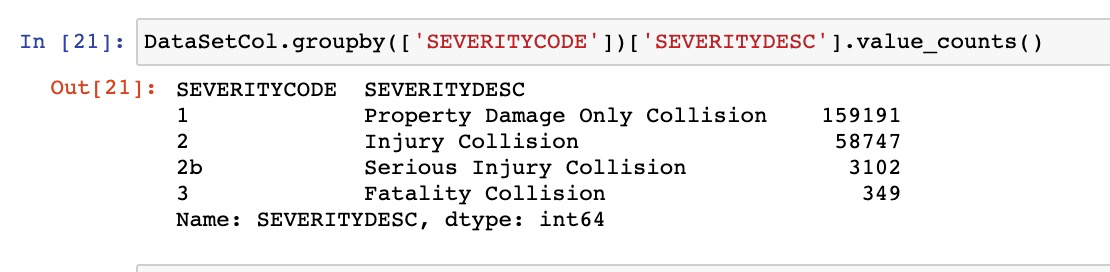

As we can see from above image of SEVERITY CODE description that it already contains INJURY,SERIOUS INJURY and FATALITY data, therefore using it PREDICTOR data will make the prediction reaching almost 100%. Therefore we need to drop these attributes so our TARGET can predict these values based on other attributes.

In [30]:
DataSetCol.drop(['INJURIES','SERIOUSINJURIES','FATALITIES'],axis=1,inplace=True)
DataSetCol.reset_index(drop=True, inplace=True)
DataSetCol.head()

,LONGITUDE,LATITUDE,ADDRTYPE,SEVERITYCODE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,-122.320757,47.609408,Block,1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
1,-122.319561,47.662221,Block,1,Mid-Block (not related to intersection),Clear,Dry,Daylight
2,-122.327525,47.604393,Block,1,Mid-Block (but intersection related),Clear,Dry,Daylight
3,-122.327525,47.708622,Block,1,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,-122.292120,47.559009,Block,1,Mid-Block (not related to intersection),Clear,Dry,Daylight


Now we will have to Re MODEL our data again as we have removed some of the attributes

## Modeling Phase 2 with Evaluation

In [31]:
X=DataSetCol[['LONGITUDE','LATITUDE','ADDRTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']].values
X[0:5]

array([[-122.32075705446199, 47.609407946167096, 'Block',
        'Mid-Block (not related to intersection)', 'Raining', 'Wet',
        'Dark - Street Lights On'],
       [-122.31956082727899, 47.6622206639028, 'Block',
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight'],
       [-122.327524507547, 47.604393272658704, 'Block',
        'Mid-Block (but intersection related)', 'Clear', 'Dry',
        'Daylight'],
       [-122.327524934468, 47.708621578681004, 'Block',
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight'],
       [-122.292120049322, 47.5590090799461, 'Block',
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight']], dtype=object)

In [32]:
from sklearn import preprocessing

le_add = preprocessing.LabelEncoder()
le_add.fit(['Block','Intersection'])
X[:,2] = le_add.transform(X[:,2]) 


le_jt = preprocessing.LabelEncoder()
le_jt.fit([ 'Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction'])
X[:,3] = le_jt.transform(X[:,3])


le_wea = preprocessing.LabelEncoder()
le_wea.fit([ 'Clear', 'Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy','Blowing Snow'])
X[:,4] = le_wea.transform(X[:,4]) 

le_rd = preprocessing.LabelEncoder()
le_rd.fit([ 'Dry', 'Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,5] = le_rd.transform(X[:,5]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit([ 'Daylight', 'Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'])
X[:,6] = le_lc.transform(X[:,6]) 


In [33]:
y=DataSetCol['SEVERITYCODE'].values
y

array(['1', '1', '1', ..., '2', '2', '1'], dtype=object)

Re Normalizing the data X

In [34]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.33268175, -0.19255865, -0.70880319,  0.89314954,  1.99944197,
         1.86209684, -1.67905025],
       [ 0.37248266,  0.74981105, -0.70880319,  0.89314954, -0.59071182,
        -0.54329703,  0.53721527],
       [ 0.10751485, -0.28203854, -0.70880319,  0.16664132, -0.59071182,
        -0.54329703,  0.53721527],
       [ 0.10750064,  1.57777101, -0.70880319,  0.89314954, -0.59071182,
        -0.54329703,  0.53721527],
       [ 1.28549306, -1.09185651, -0.70880319,  0.89314954, -0.59071182,
        -0.54329703,  0.53721527]])

Making Train Test Split again with updated dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (171134, 7) (171134,)
Test set: (42784, 7) (42784,)


### KNN

* The K-Nearest Neighbors algorithm is a classification algorithm that takes a bunch of labeled points and uses them to learn how to label other points. 
** A method of classifying cases, based on the similarity of other cases.
** Cases that are near each other are said to be neighbors.
** Based on similar cases with same class labels are near each other.

In [63]:
#Using same value as we took before which is 4 to fit the model now.
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [64]:
#Predicting the Model
yhat = neigh.predict(X_test)
yhat[0:5]

array(['1', '1', '1', '1', '1'], dtype=object)

In [65]:
#Now checking the updated Accuracy after removing the SIMILAR attributes
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7553788259492561
Test set Accuracy:  0.6901645474943904


We have checked different combinations of test split like 30%, 25% & 20% with random state 3 and 4. We found out that there was no big difference in Train and Test accuracy score. Therefore we select the 30% test split with random state 3.

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

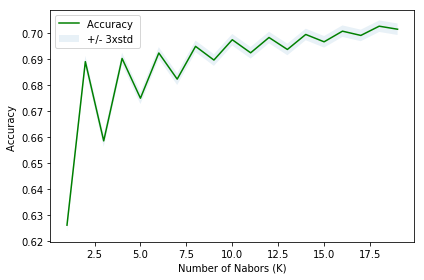

The best accuracy was with 0.7025757292445775 with k= 18


In [66]:
Ks = 20 #It will check for value of k until 20 and provide the best k value. We can use it higher but as the number of data values are very high so it will take lot of time 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Now as per above the best value for k within 20 counts is <b> 18 </b> to get the best accuracy. Lets try this value and find out the Train and Test accuracy

In [37]:
from sklearn.neighbors import KNeighborsClassifier
k = 18
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [38]:
#Predicting the Model with k = 18
yhat = neigh.predict(X_test)
yhat[0:5]

array(['1', '1', '1', '1', '1'], dtype=object)

In [40]:
#Now checking the updated Accuracy after changing value of k to 18
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("F1 Score: ", f1_score(y_test, yhat, average='weighted'))
print("Jaccard set Accuracy: ", jaccard_similarity_score(y_test, yhat))

Train set Accuracy:  0.7282012925543726
Test set Accuracy:  0.7025757292445775
F1 Score:  0.634744714720991
Jaccard set Accuracy:  0.7025757292445775


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now with k=18 our Train set accuracy was reduced but Test set accuracy improved and the difference between Train and Test set is reduced, makint it more appropriate

### DECISION TREE

* The basic intuition behind a decision tree is to map out all possible decision paths in the form of a tree.
* Decision trees are about testing an attribute and branching the cases based on the result of the test.

In [41]:
from sklearn.tree import DecisionTreeClassifier
AccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth=8) # We are using maximum depth of 8.
AccidentTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
#Fitting the Training Model
AccidentTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
PredAccTree = AccidentTree.predict(X_test)
print (PredAccTree [0:5])
print (y_test [0:5])

['1' '1' '1' '1' '1']
['2' '1' '1' '1' '1']


In [44]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, PredAccTree))
print("F1 Score: ", f1_score(y_test, PredAccTree, average='weighted'))
print("Jaccard set Accuracy: ", jaccard_similarity_score(y_test, PredAccTree))

DecisionTrees's Accuracy:  0.712556095736724
F1 Score:  0.5976301040721486
Jaccard set Accuracy:  0.712556095736724


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
#To visualize the decision tree
!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "AccidentTree.png"
featureNames = DataSetCol.columns[0:7]
targetNames = DataSetCol["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(AccidentTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Logistic Regression

* It is a classification algorithm for categorical variables
* It is analogous to linear regression but tries to predict a categorical or discrete target field instead of numeric one.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LReg

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
yhat_LR = LReg.predict(X_test)
yhat_LR

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

Predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [47]:
yhat_LR_prob = LReg.predict_proba(X_test)
yhat_LR_prob

array([[0.81424343, 0.16899799, 0.01260696, 0.00415163],
       [0.81012425, 0.17374184, 0.01157577, 0.00455815],
       [0.79526298, 0.18111171, 0.01792549, 0.00569982],
       ...,
       [0.80968807, 0.17439428, 0.01160183, 0.00431582],
       [0.73808493, 0.24042555, 0.01639413, 0.00509539],
       [0.50093377, 0.46389278, 0.02845635, 0.0067171 ]])

In [49]:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))
print("F1 Score: ", f1_score(y_test, yhat_LR, average='weighted'))
print("JAccard set Accuracy: ", jaccard_similarity_score(y_test, yhat_LR))
print ("LogLoss: : %.4f" % log_loss(y_test, yhat_LR_prob))

Logistic Regression Accuracy:  0.712252243829469


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score:  0.5946699464629301
JAccard set Accuracy:  0.712252243829469
LogLoss: : 0.6408


## Support Vector Machine

SVM is a supervised algorithm that classifies the cases by finding a seperator.
1. Mapping data to a high dimensional feature space so data points can be categorized.
2. Then a seperator is estimated for the data. The data should be transformed in such a way that a separator could be drawn as a hyperplane.
3. It can be seperable by the curve but not a line. This is the most common used cases.
4. the SVM algorithm outputs an optimal hyperplane that categorizes new examples.

In [ ]:
from sklearn import svm
sev_svm = svm.SVC(kernel='rbf')
sev_svm.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
yhat_svm = sev_svm.predict(X_test)
yhat [0:5]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn import metrics
print("SVM Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))
print("F1 Score: ", f1_score(y_test, yhat_svm, average='weighted'))
print("JAccard set Accuracy: ", jaccard_similarity_score(y_test, yhat_svm))

## Conclusion

We have modelled and Evaluated our data with following models individually
* KNN
* Decision Tree
* Logistic Regression
* SVM

From the results of their accuracy models, we can see that all of them experienced accuracy of more than 70% which is a good indication based on the huge data we recieved.
From Evaluation point of the view, we can see the Jaccard set Accuracy for all of them is also greatehr than 70%, which is also a good sign and proves the confidence on our working model.
F1 Score for KNN is around 63% whereas for Decision Tree, Logistic Regression and SVM, it is around 59%. We can consider this a acceptable.